In [1]:
import math
import numpy as py
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as pl


In [2]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
df=pd.read_csv('Downloads/BANK DATA.csv')
df=df.loc[:3368,:'SUN.AX']

In [3]:
data=df['AMP.AX']
modeldata=data.values
train_len=math.ceil(len(modeldata)*0.8)
pre_train_set=modeldata.reshape(-1,1)[:train_len,:]
pre_test_set=modeldata.reshape(-1,1)[train_len-60:,:]

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
train_set=scaler.fit_transform(pre_train_set)
test_set=scaler.fit_transform(pre_test_set)

In [5]:
x_train=[]
y_train=[]

for i in range(60,train_len):
    x_train.append(train_set[i-60:i,0])
    y_train.append(train_set[i,0 ])
    if i<=60:
        print(x_train)
        print(y_train)
        print()
x_train,y_train=py.array(x_train),py.array(y_train)
#LSTM requires to have 3D input
x_train=py.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

[array([0.91814757, 0.94814321, 0.95130044, 0.93867118, 0.94024949,
       0.94340672, 0.94814321, 0.93077715, 0.93393502, 0.89604598,
       0.85815725, 0.84237044, 0.84394875, 0.80921758, 0.82342577,
       0.78237949, 0.71449514, 0.72238917, 0.74606907, 0.72238917,
       0.58346323, 0.66397684, 0.67818503, 0.78080088, 0.76659237,
       0.73501875, 0.69870801, 0.71449514, 0.71765269, 0.68765706,
       0.66713408, 0.64976865, 0.64976865, 0.64187461, 0.67818503,
       0.60082866, 0.5960928 , 0.56925472, 0.58819908, 0.63871769,
       0.57714844, 0.59451418, 0.56451855, 0.5960928 , 0.63556014,
       0.69239354, 0.63240259, 0.64345323, 0.57022877, 0.5262941 ,
       0.50676758, 0.51815805, 0.49537711, 0.49863153, 0.497004  ,
       0.55395699, 0.48724106, 0.5083951 , 0.48561385, 0.53442984])]
[0.5930100327272131]



In [6]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='MSE')

In [7]:
model.fit(x_train,y_train, batch_size=20, epochs=30)


Epoch 1/30
132/132 [==============================] - 10s 44ms/step - loss: 0.0729
Epoch 2/30
132/132 [==============================] - 6s 42ms/step - loss: 0.0020
Epoch 3/30
132/132 [==============================] - 7s 51ms/step - loss: 0.0018
Epoch 4/30
132/132 [==============================] - 5s 40ms/step - loss: 0.0016
Epoch 5/30
132/132 [==============================] - 5s 41ms/step - loss: 0.0013
Epoch 6/30
132/132 [==============================] - 7s 57ms/step - loss: 0.0013
Epoch 7/30
132/132 [==============================] - 7s 53ms/step - loss: 0.0011
Epoch 8/30
132/132 [==============================] - 7s 50ms/step - loss: 0.0010
Epoch 9/30
132/132 [==============================] - 6s 45ms/step - loss: 8.8749e-04
Epoch 10/30
132/132 [==============================] - 6s 46ms/step - loss: 9.0265e-04
Epoch 11/30
132/132 [==============================] - 6s 49ms/step - loss: 6.9449e-04
Epoch 12/30
132/132 [==============================] - 6s 47ms/step - loss: 5.9781e

In [8]:
x_test=[]
y_test=modeldata.reshape(-1,1)[train_len:,:]
for i in range(60, len(test_set)):
    x_test.append(test_set[i-60:i,0])
x_test=py.array(x_test)
x_test=py.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions.reshape(1,-1)

array([[3.1251926, 3.1451268, 3.1269438, 3.0893514, 3.0891209, 3.136498 ,
        3.1211615, 3.0829856, 3.0728772, 3.083247 , 3.0666227, 3.0569627,
        3.048012 , 3.0299704, 3.0386202, 2.985318 , 2.8926554, 2.9000115,
        2.95842  , 2.9177825, 2.939608 , 2.9672148, 2.975843 , 2.9379992,
        2.9344094, 2.9442124, 2.9008396, 2.9431663, 2.8851333, 2.800547 ,
        2.815787 , 2.839221 , 2.8507924, 2.8503737, 2.821985 , 2.8187988,
        2.819085 , 2.8192785, 2.828016 , 2.8813362, 2.9814708, 2.9324663,
        2.9849503, 2.9528542, 3.020158 , 3.0524762, 2.3214214, 2.1919618,
        2.1839595, 2.1588857, 2.2905102, 2.4574885, 2.5186028, 2.5519648,
        2.517057 , 2.451517 , 2.4062889, 2.4530897, 2.3894908, 2.3300476,
        2.3168807, 2.336639 , 2.3844686, 2.392759 , 2.3164647, 2.2281296,
        2.232225 , 2.2717118, 2.2247984, 2.2461822, 2.1879122, 2.247054 ,
        2.254095 , 2.300575 , 2.2754319, 2.2502074, 2.2291825, 2.1625025,
        2.111666 , 2.098201 , 2.147335

In [9]:
#RMSE
rmse=py.sqrt(py.mean(((predictions- y_test)**2)))
rmse

0.05820938992086323

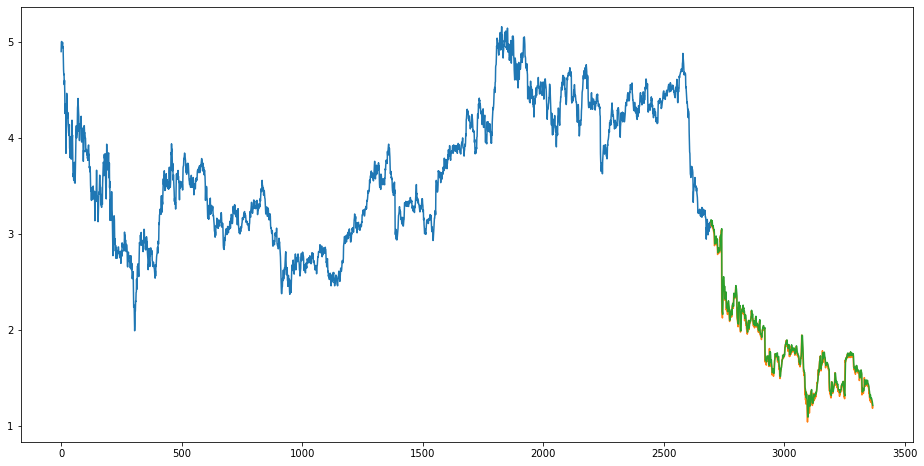

In [10]:
train=pd.DataFrame(data[:train_len])
valid=pd.DataFrame(data[train_len:])
#valid=valid.reset_index()
#train=train.reset_index()
valid['Prediction']=predictions
pl.figure(figsize=(16,8))
pl.plot(train['AMP.AX'])
pl.plot(valid['AMP.AX'])
pl.plot(valid['Prediction'])
pl.show()

In [12]:
y_test=py.array(y_test)
y_test=py.reshape(y_test,(y_test.shape[0],y_test.shape[1],1))
forecast=model.predict(y_test)